In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.2 MB 38 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from PIL import ImageFont, ImageDraw, Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from keras import models

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join(r"/content/drive/MyDrive/AI Python/Dataset/") 

subfolders = [ f.name for f in os.scandir(DATA_PATH) if f.is_dir() ]
print(subfolders)

# Actions that we try to detect
actions = ['星期二', '幾月幾號', '台北', '星期一', '星期三', '有', '什麼', '完了嗎', '將近', '父母', '一共', '買', '家裡', '房子', '銀行', '昨天', '認識', '見她', '今天', '久', '比較', '一', '手語', '你', '他們', '星期五', '是嗎', '誰', '還沒有', '星期六', '桃園', '朋友', '高鐵到', '吃飯', '會不會呢', '我問你', '生日', '我們兩個', '租', '棒', '孩子', '零', '星期天', '明天', '運動', '星期四', '捷運站', '一樣', '上課', '我', '年齡', '無', '天氣', '相見', '名字']

# Thirty videos worth of data
no_sequences = 60


# Videos are going to be 60 frames in length
sequence_length = 60

# Folder start
start_folder = 30


['不是', '公分', 'OLD DATA', 'Data', 'Bert']


In [ ]:
sequences = np.load('/content/drive/MyDrive/AI Python/Dataset/Refined_New_X.npy')
labels = np.load('/content/drive/MyDrive/AI Python/Dataset/Refined_New_Y.npy')

In [ ]:
np.array(sequences).shape 
#(300,60,258) == 正常

(3300, 60, 165)

In [ ]:
np.array(labels).shape

(3300,)

In [ ]:
X = np.array(sequences)
print(X.shape)

(3300, 60, 165)


In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y.shape

(3300, 55)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(165, 55)

In [ ]:
pip install autokeras

     |████████████████████████████████| 166 kB 13.7 MB/s 
     |████████████████████████████████| 96 kB 5.6 MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=326bd2a11e60a7d7bbe535d580c894deeb08081fba15ad6a200968b3444640aa
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built kt-legacy


In [ ]:
import autokeras as ak
from autokeras.blocks import RNNBlock
inputs = ak.Input()
outputs = ak.RNNBlock(
    return_sequences=False, num_layers=None, layer_type=None,)(inputs)
outputs= ak.DenseBlock(num_layers=None, num_units=None, use_batchnorm=None, dropout=None,)(outputs)
outputs = ak.ClassificationHead()(outputs)


auto_model = ak.AutoModel(
    inputs,
    outputs,
    project_name="auto_model",
    max_trials=50,
    directory=None,
    objective="val_loss",
    tuner="greedy",
    overwrite=False,
    seed=None,
    max_model_size=None,
)

INFO:tensorflow:Reloading Oracle from existing project ./auto_model/oracle.json


In [ ]:
auto_model.fit(X_train, y_train, batch_size=32, epochs=40,validation_split=0.1,verbose=1)

Trial 50 Complete [00h 03m 25s]
val_loss: 0.027441974729299545

Best val_loss So Far: 0.018278440460562706
Total elapsed time: 02h 36m 37s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
164/164 [==============================] - 10s 25ms/step - loss: 3.7286 - accuracy: 0.1206
Epoch 2/40
164/164 [==============================] - 4s 25ms/step - loss: 2.6891 - accuracy: 0.4356
Epoch 3/40
164/164 [==============================] - 4s 25ms/step - loss: 1.6585 - accuracy: 0.7123
Epoch 4/40
164/164 [==============================] - 4s 24ms/step - loss: 0.8150 - accuracy: 0.8687
Epoch 5/40
164/164 [==============================] - 4s 24ms/step - loss: 0.3881 - accuracy: 0.9326
Epoch 6/40
164/164 [==============================] - 4s 24ms/step - loss: 0.2055 - accuracy: 0.9627
Epoch 7/40
164/164 [==============================] - 4s 25ms/step - loss: 0.1380 - accuracy: 0.9709
Epoch 8/40
164/164 [==============================] - 4s 24ms/step - loss: 0.0909 - accuracy: 0.9824
Epoch 9/40
164

INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


In [ ]:
auto_model = auto_model.export_model()

In [ ]:
print(auto_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 165)]         0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 60, 165)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 330)           328680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 330)               492030    
_________________________________________________________________
dense (Dense)                (None, 64)                21184     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0     

In [ ]:
auto_model.get_config()

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 165),
    'dtype': 'float64',
    'name': 'input_1',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Custom>CastToFloat32',
   'config': {'dtype': 'float32',
    'name': 'cast_to_float32',
    'trainable': True},
   'inbound_nodes': [[['input_1', 0, 0, {}]]],
   'name': 'cast_to_float32'},
  {'class_name': 'Bidirectional',
   'config': {'dtype': 'float32',
    'layer': {'class_name': 'GRU',
     'config': {'activation': 'tanh',
      'activity_regularizer': None,
      'bias_constraint': None,
      'bias_initializer': {'class_name': 'Zeros',
       'config': {},
       'shared_object_id': 4},
      'bias_regularizer': None,
      'dropout': 0.0,
      'dtype': 'float32',
      'go_backwards': False,
      'implementation': 2,
      'kernel_constraint': None,
      'kernel_initializer': {'class_name': 'G

In [ ]:
test_loss, test_accuracy = auto_model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

9/9 [==============================] - 1s 11ms/step - loss: 0.0407 - accuracy: 0.9891
test_loss=0.040681444108486176
test_accuracy=0.9890909194946289


In [ ]:
auto_model.save('auto_action',save_format="tf")

INFO:tensorflow:Assets written to: auto_action/assets


INFO:tensorflow:Assets written to: auto_action/assets


In [ ]:
model = models.load_model('/content/auto_action.h5')

ValueError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional, BatchNormalization,ReLU,Activation
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(Bidirectional(GRU(256, return_sequences=True, activation='tanh'), input_shape=(60,165)))
model.add(Bidirectional(GRU(128, return_sequences=False, activation='tanh')))
model.add(Dense(64, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 60, 512)           649728    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               493056    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 55)                3575      
Total params: 1,163,063
Trainable params: 1,162,935
Non-trainable params: 128
__________________________________________

In [ ]:
#AUTO_MODEL Architecture V2 (100)
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="auto", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')

model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr,earlystopping])


Epoch 1/30
147/147 [==============================] - 8s 25ms/step - loss: 2.8877 - categorical_accuracy: 0.3141 - val_loss: 2.1885 - val_categorical_accuracy: 0.4799
Epoch 2/30
147/147 [==============================] - 3s 19ms/step - loss: 1.4122 - categorical_accuracy: 0.7099 - val_loss: 0.9407 - val_categorical_accuracy: 0.7744
Epoch 3/30
147/147 [==============================] - 3s 19ms/step - loss: 0.6640 - categorical_accuracy: 0.8694 - val_loss: 0.5009 - val_categorical_accuracy: 0.8776
Epoch 4/30
147/147 [==============================] - 3s 19ms/step - loss: 0.3638 - categorical_accuracy: 0.9217 - val_loss: 0.3225 - val_categorical_accuracy: 0.9216
Epoch 5/30
147/147 [==============================] - 3s 19ms/step - loss: 0.2308 - categorical_accuracy: 0.9456 - val_loss: 0.2643 - val_categorical_accuracy: 0.9331
Epoch 6/30
147/147 [==============================] - 3s 19ms/step - loss: 0.1663 - categorical_accuracy: 0.9626 - val_loss: 0.1954 - val_categorical_accuracy: 0.942

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

9/9 [==============================] - 0s 10ms/step - loss: 0.0395 - categorical_accuracy: 0.9927
test_loss=0.039542004466056824
test_accuracy=0.9927272796630859


In [ ]:
model.save('auto_action_V2.h5')

In [ ]:
#AUTO_MODEL Architecture (100)
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="auto", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')

model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr,earlystopping])


Epoch 1/30
147/147 [==============================] - 13s 38ms/step - loss: 2.8414 - categorical_accuracy: 0.3271 - val_loss: 2.0906 - val_categorical_accuracy: 0.5564
Epoch 2/30
147/147 [==============================] - 4s 30ms/step - loss: 1.3814 - categorical_accuracy: 0.7248 - val_loss: 0.8734 - val_categorical_accuracy: 0.8107
Epoch 3/30
147/147 [==============================] - 4s 30ms/step - loss: 0.6480 - categorical_accuracy: 0.8709 - val_loss: 0.5075 - val_categorical_accuracy: 0.8738
Epoch 4/30
147/147 [==============================] - 4s 30ms/step - loss: 0.3564 - categorical_accuracy: 0.9315 - val_loss: 0.3672 - val_categorical_accuracy: 0.9216
Epoch 5/30
147/147 [==============================] - 4s 30ms/step - loss: 0.2208 - categorical_accuracy: 0.9513 - val_loss: 0.1891 - val_categorical_accuracy: 0.9579
Epoch 6/30
147/147 [==============================] - 4s 30ms/step - loss: 0.1431 - categorical_accuracy: 0.9696 - val_loss: 0.2405 - val_categorical_accuracy: 0.93

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

9/9 [==============================] - 0s 13ms/step - loss: 0.0505 - categorical_accuracy: 0.9927
test_loss=0.05049014836549759
test_accuracy=0.9927272796630859


In [ ]:
model.save('action.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional, BatchNormalization,ReLU,Activation
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(Bidirectional(LSTM(512, return_sequences=True, activation='elu'), input_shape=(60,165)))
model.add(Bidirectional(LSTM(1024, return_sequences=True, activation='elu')))
model.add(Bidirectional(LSTM(512, return_sequences=False, activation='elu')))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_33 (Bidirectio (None, 60, 1024)          2777088   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 60, 2048)          16785408  
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 1024)              10489856  
_________________________________________________________________
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 55)                14135     
Total params: 30,722,615
Trainable params: 30,722,615
Non-trainable params: 0
_________________________________________

In [ ]:
#Bidirectional LSTM (100)
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="auto", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr,earlystopping])


Epoch 1/30
147/147 [==============================] - 90s 568ms/step - loss: nan - categorical_accuracy: 0.0187 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00001: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 2/30
147/147 [==============================] - 83s 562ms/step - loss: nan - categorical_accuracy: 0.0174 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 3/30
147/147 [==============================] - 83s 562ms/step - loss: nan - categorical_accuracy: 0.0174 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00003: early stopping


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(LSTM(512, return_sequences=True, activation='elu', input_shape=(60,165)))
model.add(LSTM(1024, return_sequences=True, activation='elu'))
model.add(LSTM(512, return_sequences=False, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 512)           1388544   
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 1024)          6295552   
_________________________________________________________________
lstm_14 (LSTM)               (None, 512)               3147776   
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_36 (Dense)             (None, 55)                14135     
Total params: 11,239,991
Trainable params: 11,239,991
Non-trainable params: 0
_________________________________________

In [ ]:
#LSTM (100)
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="auto", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')

model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr,earlystopping])


Epoch 1/30
147/147 [==============================] - 48s 310ms/step - loss: 2.9150 - categorical_accuracy: 0.1869 - val_loss: 2.2719 - val_categorical_accuracy: 0.3423
Epoch 2/30
147/147 [==============================] - 45s 308ms/step - loss: nan - categorical_accuracy: 0.1591 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
147/147 [==============================] - 45s 307ms/step - loss: nan - categorical_accuracy: 0.0174 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
147/147 [==============================] - 44s 302ms/step - loss: nan - categorical_accuracy: 0.0174 - val_loss: nan - val_categorical_accuracy: 0.0306

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(GRU(512, return_sequences=True, activation='elu', input_shape=(60,165)))
model.add(GRU(1024, return_sequences=True, activation='elu'))
model.add(GRU(512, return_sequences=False, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 60, 512)           1042944   
_________________________________________________________________
gru_4 (GRU)                  (None, 60, 1024)          4724736   
_________________________________________________________________
gru_5 (GRU)                  (None, 512)               2362368   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 55)                14135     
Total params: 8,538,167
Trainable params: 8,538,167
Non-trainable params: 0
____________________________________________

In [ ]:
#New Data Refined 100
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="auto", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr,earlystopping])


Epoch 1/30
89/89 [==============================] - 41s 413ms/step - loss: 2.3503 - categorical_accuracy: 0.3290 - val_loss: 1.7888 - val_categorical_accuracy: 0.4395
Epoch 2/30
89/89 [==============================] - 36s 405ms/step - loss: 1.1635 - categorical_accuracy: 0.6356 - val_loss: 0.8559 - val_categorical_accuracy: 0.7580
Epoch 3/30
89/89 [==============================] - 36s 403ms/step - loss: 0.6838 - categorical_accuracy: 0.7827 - val_loss: 0.5849 - val_categorical_accuracy: 0.8312
Epoch 4/30
89/89 [==============================] - 36s 405ms/step - loss: 0.4477 - categorical_accuracy: 0.8586 - val_loss: 0.3277 - val_categorical_accuracy: 0.8854
Epoch 5/30
89/89 [==============================] - 36s 405ms/step - loss: 0.3139 - categorical_accuracy: 0.8951 - val_loss: 0.3048 - val_categorical_accuracy: 0.9045
Epoch 6/30
89/89 [==============================] - 36s 405ms/step - loss: 0.2729 - categorical_accuracy: 0.9156 - val_loss: 0.3896 - val_categorical_accuracy: 0.888

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 35ms/step - loss: 0.1734 - categorical_accuracy: 0.9515
test_loss=0.173406183719635
test_accuracy=0.9515151381492615


In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import numpy as np
y_test=np.argmax(y_test, axis=1)

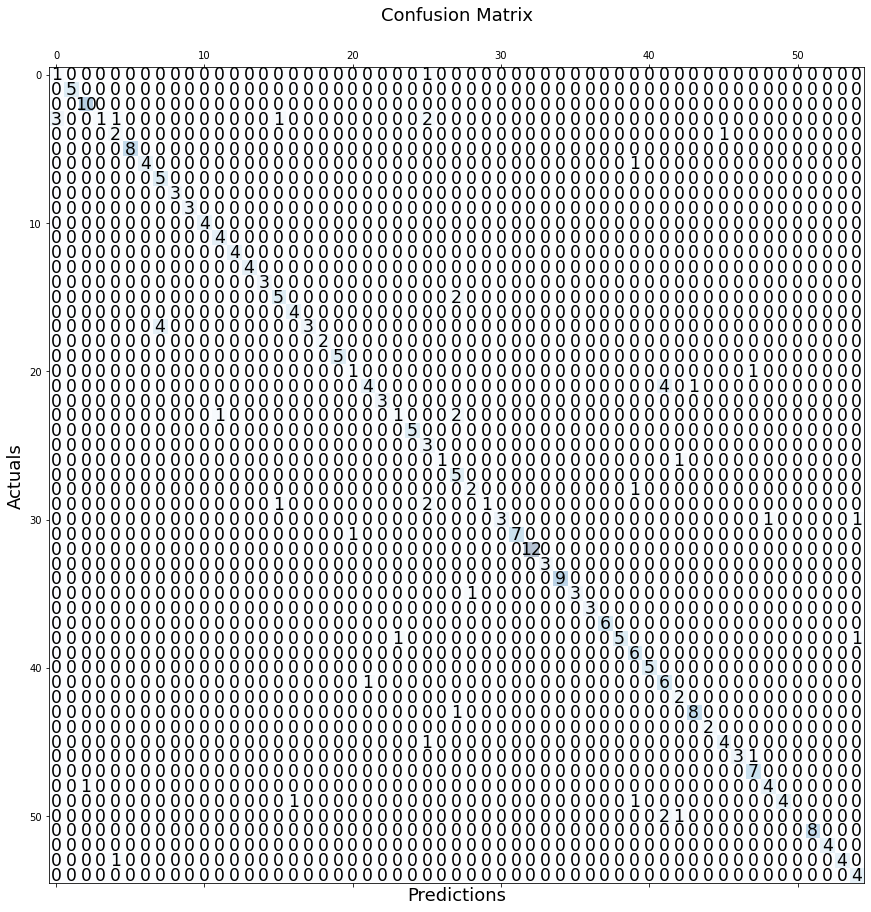

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24190 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

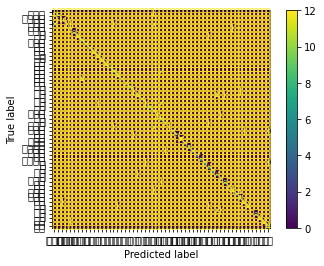

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=actions)
disp.plot() 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(GRU(512, return_sequences=True, activation='elu', input_shape=(60,165)))
model.add(GRU(1024, return_sequences=True, activation='elu'))
model.add(GRU(512, return_sequences=False, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(np.array(actions).shape[0], activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 60, 512)           1042944   
_________________________________________________________________
gru_4 (GRU)                  (None, 60, 1024)          4724736   
_________________________________________________________________
gru_5 (GRU)                  (None, 512)               2362368   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 55)                14135     
Total params: 8,538,167
Trainable params: 8,538,167
Non-trainable params: 0
____________________________________________

In [ ]:
#New Data Refined 100
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="max", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr])


Epoch 1/30
147/147 [==============================] - 45s 276ms/step - loss: 2.5615 - categorical_accuracy: 0.2943 - val_loss: 1.4560 - val_categorical_accuracy: 0.5392
Epoch 2/30
147/147 [==============================] - 39s 266ms/step - loss: 1.1257 - categorical_accuracy: 0.6553 - val_loss: 0.6727 - val_categorical_accuracy: 0.7935
Epoch 3/30
147/147 [==============================] - 39s 268ms/step - loss: 0.6744 - categorical_accuracy: 0.7952 - val_loss: 0.4173 - val_categorical_accuracy: 0.8642
Epoch 4/30
147/147 [==============================] - 40s 271ms/step - loss: 0.5033 - categorical_accuracy: 0.8420 - val_loss: 0.5471 - val_categorical_accuracy: 0.8451

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
147/147 [==============================] - 38s 262ms/step - loss: 0.1429 - categorical_accuracy: 0.9547 - val_loss: 0.1331 - val_categorical_accuracy: 0.9579
Epoch 6/30
147/147 [==============================] - 40s 271ms/step - lo

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

9/9 [==============================] - 0s 29ms/step - loss: 0.0818 - categorical_accuracy: 0.9818
test_loss=0.08176063746213913
test_accuracy=0.9818181991577148


In [ ]:
#New Data Refined
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="max", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30,
              batch_size = 32,
              callbacks=[rlr])


Epoch 1/30
89/89 [==============================] - 27s 279ms/step - loss: 2.5095 - categorical_accuracy: 0.2864 - val_loss: 1.6926 - val_categorical_accuracy: 0.4490
Epoch 2/30
89/89 [==============================] - 24s 274ms/step - loss: 1.1346 - categorical_accuracy: 0.6349 - val_loss: 0.7142 - val_categorical_accuracy: 0.7771
Epoch 3/30
89/89 [==============================] - 24s 275ms/step - loss: 0.6089 - categorical_accuracy: 0.7909 - val_loss: 0.6992 - val_categorical_accuracy: 0.7452
Epoch 4/30
89/89 [==============================] - 23s 263ms/step - loss: 0.4662 - categorical_accuracy: 0.8334 - val_loss: 0.3576 - val_categorical_accuracy: 0.8949
Epoch 5/30
89/89 [==============================] - 24s 273ms/step - loss: 0.2638 - categorical_accuracy: 0.9078 - val_loss: 0.5291 - val_categorical_accuracy: 0.8535

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/30
89/89 [==============================] - 24s 271ms/step - loss: 0.1366 -

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 23ms/step - loss: 0.1027 - categorical_accuracy: 0.9636
test_loss=0.10265742242336273
test_accuracy=0.9636363387107849


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 23ms/step - loss: 0.1260 - categorical_accuracy: 0.9576
test_loss=0.1260189265012741
test_accuracy=0.9575757384300232


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 35ms/step - loss: 0.1635 - categorical_accuracy: 0.9333
test_loss=0.16348999738693237
test_accuracy=0.9333333373069763


In [ ]:
#Refined V2 (shelly)

from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="max", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30, 
              batch_size = 32,
              callbacks=[rlr])

Epoch 1/30
89/89 [==============================] - 41s 417ms/step - loss: 3.3446 - categorical_accuracy: 0.1354 - val_loss: 2.9028 - val_categorical_accuracy: 0.1561
Epoch 2/30
89/89 [==============================] - 37s 412ms/step - loss: 2.4925 - categorical_accuracy: 0.2570 - val_loss: 2.2417 - val_categorical_accuracy: 0.3280
Epoch 3/30
89/89 [==============================] - 37s 411ms/step - loss: 1.8506 - categorical_accuracy: 0.4328 - val_loss: 1.8866 - val_categorical_accuracy: 0.4395
Epoch 4/30
89/89 [==============================] - 37s 413ms/step - loss: 1.5127 - categorical_accuracy: 0.5296 - val_loss: 1.5350 - val_categorical_accuracy: 0.5637
Epoch 5/30
89/89 [==============================] - 37s 420ms/step - loss: 1.2003 - categorical_accuracy: 0.6189 - val_loss: 1.5253 - val_categorical_accuracy: 0.5573
Epoch 6/30
89/89 [==============================] - 37s 420ms/step - loss: 0.9895 - categorical_accuracy: 0.6792 - val_loss: 1.2320 - val_categorical_accuracy: 0.595

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 36ms/step - loss: 0.6545 - categorical_accuracy: 0.8303
test_loss=0.6544967293739319
test_accuracy=0.8303030133247375


In [ ]:
#R1 shelly
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="max", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30, 
              batch_size = 32,
              callbacks=[rlr])

Epoch 1/30
89/89 [==============================] - 42s 433ms/step - loss: 3.0058 - categorical_accuracy: 0.2109 - val_loss: 2.3727 - val_categorical_accuracy: 0.3217
Epoch 2/30
89/89 [==============================] - 38s 424ms/step - loss: 1.8596 - categorical_accuracy: 0.4378 - val_loss: 1.7411 - val_categorical_accuracy: 0.4554
Epoch 3/30
89/89 [==============================] - 38s 424ms/step - loss: 1.3050 - categorical_accuracy: 0.5884 - val_loss: 1.1587 - val_categorical_accuracy: 0.6369
Epoch 4/30
89/89 [==============================] - 38s 424ms/step - loss: 0.9340 - categorical_accuracy: 0.7005 - val_loss: 1.0789 - val_categorical_accuracy: 0.6210
Epoch 5/30
89/89 [==============================] - 38s 423ms/step - loss: 0.8484 - categorical_accuracy: 0.7153 - val_loss: 0.7734 - val_categorical_accuracy: 0.7293
Epoch 6/30
89/89 [==============================] - 38s 425ms/step - loss: 0.6367 - categorical_accuracy: 0.7937 - val_loss: 0.8127 - val_categorical_accuracy: 0.742

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 37ms/step - loss: 0.3662 - categorical_accuracy: 0.8848
test_loss=0.36623644828796387
test_accuracy=0.8848484754562378


In [ ]:
model.save('action.h5')

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['categorical_accuracy'])
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AI Python/Dataset/Dropout.h5', monitor='val_categorical_accuracy', mode="max", save_best_only=True, verbose=1)
#earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode="max", patience=3, verbose=1)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto')


model.fit(X_train, y_train,validation_split = 0.1,
              epochs=30, 
              batch_size = 32,
              callbacks=[rlr])

Epoch 1/30
89/89 [==============================] - 41s 418ms/step - loss: 2.7379 - categorical_accuracy: 0.2442 - val_loss: 1.8202 - val_categorical_accuracy: 0.4045
Epoch 2/30
89/89 [==============================] - 36s 408ms/step - loss: 1.3341 - categorical_accuracy: 0.5689 - val_loss: 1.0366 - val_categorical_accuracy: 0.6210
Epoch 3/30
89/89 [==============================] - 37s 411ms/step - loss: 0.8338 - categorical_accuracy: 0.7214 - val_loss: 0.8474 - val_categorical_accuracy: 0.7357
Epoch 4/30
89/89 [==============================] - 36s 405ms/step - loss: 0.6083 - categorical_accuracy: 0.7926 - val_loss: 0.6677 - val_categorical_accuracy: 0.7739
Epoch 5/30
89/89 [==============================] - 36s 407ms/step - loss: 0.4171 - categorical_accuracy: 0.8501 - val_loss: 0.5449 - val_categorical_accuracy: 0.8376
Epoch 6/30
89/89 [==============================] - 36s 403ms/step - loss: 0.3763 - categorical_accuracy: 0.8731 - val_loss: 0.5072 - val_categorical_accuracy: 0.824

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

6/6 [==============================] - 0s 25ms/step - loss: 0.1580 - categorical_accuracy: 0.9455
test_loss=0.15798039734363556
test_accuracy=0.9454545378684998


In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[0])]

In [ ]:
actions[np.argmax(y_test[0])]

In [ ]:
model.save('action.h5')